**SETTING UP THE ENVIRONMENT AND STORAGE**

We need to mount our google drive as the file storage in which we access the files we will upload to our model.

In [1]:
# ONLY OPEN WHEN IT IS RUN ON GOOGLE COLAB
# from google.colab import drive

# drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# ONLY OPEN WHEN IT IS RUN ON GOOGLE COLAB
# %cd /content/drive/MyDrive/ml_files/
# !ls

/content/drive/MyDrive/ml_files
 fars.csv   Tweets_dev.csv	   Tweets_test.csv
 fars.dat  'Tweets_test (1).csv'   Tweets_train.csv


In [3]:
%matplotlib inline
# Basic Operation
import pandas as pd
import numpy as np

# Text Preprocessing & Cleaning
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import re
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_score

from sklearn.model_selection import train_test_split # Split Data 
from imblearn.over_sampling import SMOTE # Handling Imbalanced

# Model Building
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline


from sklearn.metrics import classification_report , confusion_matrix , accuracy_score # Performance Metrics 
from sklearn.pipeline import make_pipeline

from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score, precision_recall_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Data Visualization 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from termcolor import cprint
import seaborn as sns
import warnings 

**GETTING READY WITH OUR DATASET**

Reading our Tweets_train.csv, Tweets_dev.csv and Tweets_test files We need the data to build a model that predicts sentiment labels (positive, negative or neutral). 

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport 

# ONLY OPEN WHEN IT IS RUN ON GOOGLE COLAB
# FROM GOOGLE COLAB
# training_set = pd.read_csv('Tweets_train.csv')
# validation_set = pd.read_csv('Tweets_dev.csv')
# test_set = pd.read_csv('Tweets_test.csv') 

# FROM JUPYTER
training_set = pd.read_csv('ml_files/Tweets_train.csv')
validation_set = pd.read_csv('ml_files/Tweets_dev.csv')
test_set = pd.read_csv('ml_files/Tweets_test.csv') 

Let's print out the head of our dataframes to know the features and select the targets.

In [2]:
training_set.head()

,tweet_id,text,airline_sentiment
0,569179849518161920,@united you're good. Thank you!,positive
1,569835751275433984,"@AmericanAir way to ruin a vacation, my brothe...",negative
2,568588936852799488,@JetBlue yes thankfully! Catering just got her...,positive
3,569525116725567491,@USAirways The automated message isn't helpful...,negative
4,568807823187976193,@JetBlue I'm #MakingLoveOutofNothingAtAll on m...,positive


In [7]:
validation_set.head()

,tweet_id,text,airline_sentiment
0,568107472260624384,@southwestair Great job celebrating #MardiGras...,positive
1,568215698524246016,@southwestair thanks for taking it up a notch!...,positive
2,567842466851905536,@USAirways Being put back on hold for what has...,negative
3,568834824410148864,@united Thank you for your offer! All sorted o...,positive
4,569590527349252096,@JetBlue wondering if it's possible for my col...,neutral


In [8]:
test_set.head()

,Unnamed: 0,tweet_id,text,airline_sentiment
0,0,570252000000000000,@AmericanAir I need refund.,negative
1,1,568173000000000000,@USAirways after 3 Cancelled Flightlations and...,negative
2,2,569321000000000000,@JetBlue thanks so much. Can't wait to fly wit...,positive
3,3,569503000000000000,@united I have never been more frustrated than...,negative
4,4,568981000000000000,"@USAirways - the worst! Hold time crazy, agent...",negative


Let's see the tail of the dataframes.

In [9]:
training_set.tail()

,tweet_id,text,airline_sentiment
11853,570123872168574976,"@AmericanAir will not help us on the phone, at...",negative
11854,570063683256242177,@USAirways has the worst customer service line...,negative
11855,568032524749942784,@USAirways grades for this trip:\n\nFlight tim...,negative
11856,569705813142409217,@united Thanks for the vague canned response t...,negative
11857,569976114124349440,@united already did that at the airport and 12...,negative


In [5]:
validation_set.tail()

,tweet_id,text,airline_sentiment
1313,570060687164067840,"@AmericanAir ""sorry you were disappointed"" #ou...",negative
1314,570101371409559552,@AmericanAir were stuck on a plane in Dallas t...,negative
1315,568572753403650049,@united Lost my wallet on flight 1007 yesterda...,negative
1316,567747769176432640,@USAirways Travelling from pwm to atl on Sunda...,negative
1317,570011378091753472,@SouthwestAir thank you :),positive


In [11]:
test_set.tail()

,Unnamed: 0,tweet_id,text,airline_sentiment
1459,1459,569678000000000000,@AmericanAir I didn't miss my flight. America...,negative
1460,1460,569882000000000000,@USAirways here's to sitting on hold for 4 hrs...,negative
1461,1461,568192000000000000,@SouthwestAir just had a great flight #4223 wi...,positive
1462,1462,569775000000000000,@AmericanAir Why did AA973 return to JFK? Tha...,neutral
1463,1463,569941000000000000,@AmericanAir How can I get a flight change whi...,negative


**Exploratory Data Analysis**

Let's see our data using EDA approach.

In [12]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11858 entries, 0 to 11857
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   tweet_id           11858 non-null  int64 
 1   text               11858 non-null  object
 2   airline_sentiment  11858 non-null  object
dtypes: int64(1), object(2)
memory usage: 278.0+ KB


In [13]:
validation_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   tweet_id           1318 non-null   int64 
 1   text               1318 non-null   object
 2   airline_sentiment  1318 non-null   object
dtypes: int64(1), object(2)
memory usage: 31.0+ KB


In [14]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         1464 non-null   int64 
 1   tweet_id           1464 non-null   int64 
 2   text               1464 non-null   object
 3   airline_sentiment  1464 non-null   object
dtypes: int64(2), object(2)
memory usage: 45.9+ KB


In [6]:
training_set.describe()

,tweet_id
count,1.185800e+04
mean,5.692188e+17
std,7.804861e+14
min,5.675883e+17
25%,5.685585e+17
50%,5.694839e+17
75%,5.698913e+17
max,5.703106e+17


In [16]:
validation_set.describe()

,tweet_id
count,1.318000e+03
mean,5.692139e+17
std,7.695695e+14
min,5.676433e+17
25%,5.685730e+17
50%,5.693823e+17
75%,5.698802e+17
max,5.703088e+17


In [17]:
test_set.describe()

,Unnamed: 0,tweet_id
count,1464.00000,1.464000e+03
mean,731.50000,5.692184e+17
std,422.76471,7.770030e+14
min,0.00000,5.676550e+17
25%,365.75000,5.685620e+17
50%,731.50000,5.694595e+17
75%,1097.25000,5.698950e+17
max,1463.00000,5.703080e+17


**NAN Value Checking**

In [18]:
training_set.isnull().sum()

tweet_id             0
text                 0
airline_sentiment    0
dtype: int64

In [19]:
validation_set.isnull().sum()

tweet_id             0
text                 0
airline_sentiment    0
dtype: int64

In [20]:
test_set.isnull().sum()

Unnamed: 0           0
tweet_id             0
text                 0
airline_sentiment    0
dtype: int64

**Data Visualization**

In [22]:
%matplotlib inline

Total number of sentiments of tweets :
negative    7434
neutral     2510
positive    1914
Name: airline_sentiment, dtype: int64


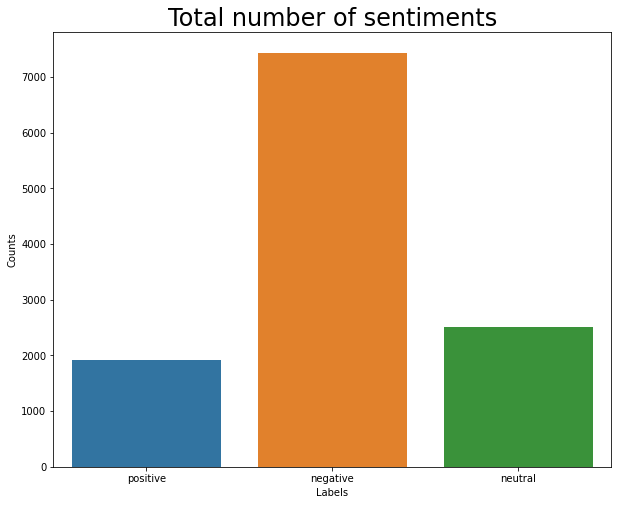

In [23]:
cprint("Total number of sentiments of tweets :")
print(training_set.airline_sentiment.value_counts())

plt.figure(figsize = (10, 8))

ax = sns.countplot(x = 'airline_sentiment', data = training_set)
ax.set_title(label = 'Total number of sentiments', fontsize = 24)
ax.set(xlabel='Labels', ylabel='Counts')

plt.show()

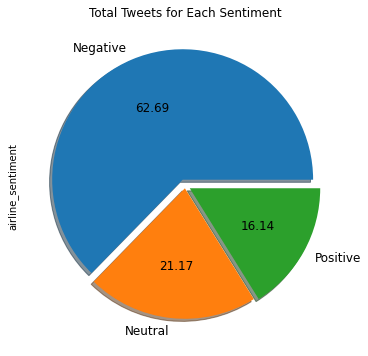

In [24]:
ax.set_title(label = 'Total number of sentiments of tweets:')
colors=sns.color_palette('tab10',10)
pd.Series(training_set['airline_sentiment']).value_counts().plot(kind='pie',colors=colors,labels=['Negative','Neutral','Positive'],explode=[0.05,0.02,0.04],shadow=True,autopct='%.2f',fontsize=12,figsize=(6,6),title="Total Tweets for Each Sentiment")

plt.show()

Total number of sentiments of tweets :
negative    826
neutral     279
positive    213
Name: airline_sentiment, dtype: int64


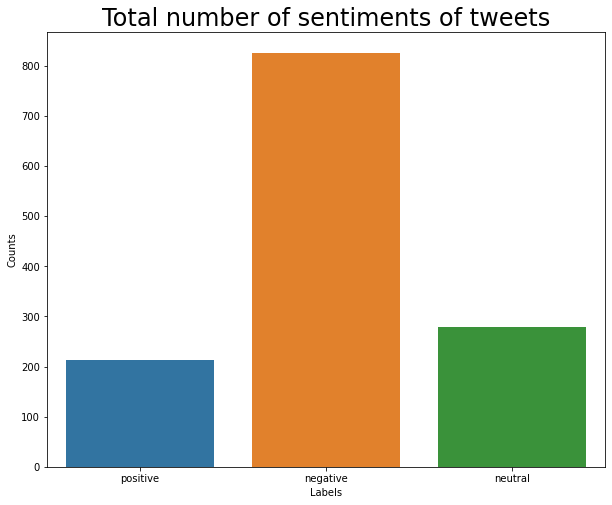

In [25]:
cprint("Total number of sentiments of tweets :")
print(validation_set.airline_sentiment.value_counts())

plt.figure(figsize = (10, 8))

ax = sns.countplot(x = 'airline_sentiment', data = validation_set)
ax.set_title(label = 'Total number of sentiments of tweets', fontsize = 24)
ax.set(xlabel='Labels', ylabel='Counts')

plt.show()

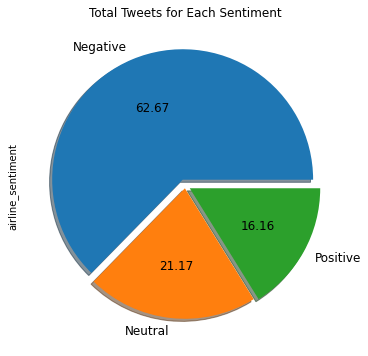

In [26]:
ax.set_title(label = 'Total number of sentiments of tweets:')
colors=sns.color_palette('tab10',10)
pd.Series(validation_set['airline_sentiment']).value_counts().plot(kind='pie',colors=colors,labels=['Negative','Neutral','Positive'],explode=[0.05,0.02,0.04],shadow=True,autopct='%.2f',fontsize=12,figsize=(6,6),title="Total Tweets for Each Sentiment")

plt.show()

Total number of sentiments of tweets :
negative    918
neutral     310
positive    236
Name: airline_sentiment, dtype: int64


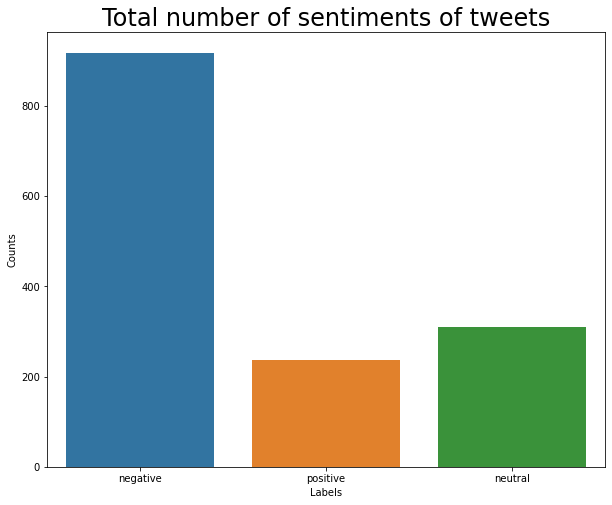

In [27]:
cprint("Total number of sentiments of tweets :")
print(test_set.airline_sentiment.value_counts())

plt.figure(figsize = (10, 8))

ax = sns.countplot(x = 'airline_sentiment', data = test_set)
ax.set_title(label = 'Total number of sentiments of tweets', fontsize = 24)
ax.set(xlabel='Labels', ylabel='Counts')

plt.show()

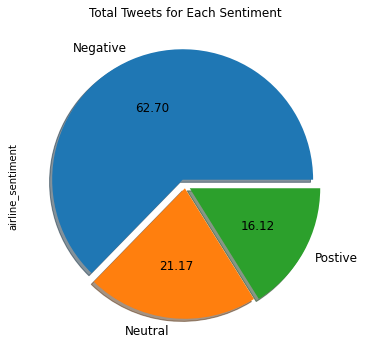

In [28]:
ax.set_title(label = 'Total number of sentiments of tweets:')
colors=sns.color_palette('tab10',10)
pd.Series(test_set['airline_sentiment']).value_counts().plot(kind='pie',colors=colors,labels=['Negative','Neutral','Postive'],explode=[0.05,0.02,0.04],shadow=True,autopct='%.2f',fontsize=12,figsize=(6,6),title="Total Tweets for Each Sentiment")

plt.show()

**Split Text Of Sentiments**

In [29]:
positive_training = training_set[training_set['airline_sentiment']=='positive'].text
neutral_training = training_set[training_set['airline_sentiment']=='neutral'].text
negative_training = training_set[training_set['airline_sentiment']=='negative'].text

positive_validation = validation_set[validation_set['airline_sentiment']=='positive'].text
neutral_validation = validation_set[validation_set['airline_sentiment']=='neutral'].text
negative_validation = validation_set[validation_set['airline_sentiment']=='negative'].text

positive_test = test_set[test_set['airline_sentiment']=='positive'].text
neutral_test = test_set[test_set['airline_sentiment']=='neutral'].text
negative_test = test_set[test_set['airline_sentiment']=='negative'].text

**Text Preprocessing and Cleaning**

In [9]:
# convert Sentiments to 0,1,2
def convert_Sentiment(sentiment):
    if  sentiment == "positive":
        return 2
    elif sentiment == "neutral":
        return 1
    elif sentiment == "negative":
        return 0

In [10]:
# Apply convert_Sentiment function
training_set.airline_sentiment = training_set.airline_sentiment.apply(lambda x : convert_Sentiment(x))
validation_set.airline_sentiment = validation_set.airline_sentiment.apply(lambda x : convert_Sentiment(x))
test_set.airline_sentiment = test_set.airline_sentiment.apply(lambda x : convert_Sentiment(x))

In [32]:
training_set.airline_sentiment

0        2
1        0
2        2
3        0
4        2
        ..
11853    0
11854    0
11855    0
11856    0
11857    0
Name: airline_sentiment, Length: 11858, dtype: int64

In [33]:
validation_set.airline_sentiment

0       2
1       2
2       0
3       2
4       1
       ..
1313    0
1314    0
1315    0
1316    0
1317    2
Name: airline_sentiment, Length: 1318, dtype: int64

In [11]:
test_set.airline_sentiment

0       0
1       0
2       2
3       0
4       0
       ..
1459    0
1460    0
1461    2
1462    1
1463    0
Name: airline_sentiment, Length: 1464, dtype: int64

In [12]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
# Remove html 
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

# Remove emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Remove url  
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

# Remove punctuations
def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

# Remove stop words
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in (stopwords.words('english'))])
    return text

# Remove @username
def remove_username(text):
    return re.sub('@[^\s]+','',text)

# Seperate alphanumeric
def seperate_alphanumeric(text):
    words = text
    words = re.findall(r"[^\W\d_]+|\d+", words)
    return " ".join(words)

def cont_rep_char(text):
    tchr = text.group(0) 
    
    if len(tchr) > 1:
        return tchr[0:2] 

def unique_char(rep, text):
    substitute = re.sub(r'(\w)\1+', rep, text)
    return substitute

def char(text):
    substitute = re.sub(r'[^a-zA-Z]',' ',text)
    return substitute

# Decontraction text
def decontraction(text):
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)
    
    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    return text  

# Initialize final text
training_set['final_text'] = training_set['text']
validation_set['final_text'] = validation_set['text'] 
test_set['final_text'] = test_set['text']

# Apply functions on tweets of Training Set
training_set['final_text'] = training_set['final_text'].apply(lambda x : remove_username(x))
training_set['final_text'] = training_set['final_text'].apply(lambda x : remove_url(x))
training_set['final_text'] = training_set['final_text'].apply(lambda x : remove_emoji(x))
training_set['final_text'] = training_set['final_text'].apply(lambda x : decontraction(x))
training_set['final_text'] = training_set['final_text'].apply(lambda x : seperate_alphanumeric(x))
training_set['final_text'] = training_set['final_text'].apply(lambda x : unique_char(cont_rep_char,x))
training_set['final_text'] = training_set['final_text'].apply(lambda x : char(x))
training_set['final_text'] = training_set['final_text'].apply(lambda x : x.lower())
training_set['final_text'] = training_set['final_text'].apply(lambda x : remove_stopwords(x))

# Apply functions on tweets of Validation Set
validation_set['final_text'] = validation_set['final_text'].apply(lambda x : remove_username(x))
validation_set['final_text'] = validation_set['final_text'].apply(lambda x : remove_url(x))
validation_set['final_text'] = validation_set['final_text'].apply(lambda x : remove_emoji(x))
validation_set['final_text'] = validation_set['final_text'].apply(lambda x : decontraction(x))
validation_set['final_text'] = validation_set['final_text'].apply(lambda x : seperate_alphanumeric(x))
validation_set['final_text'] = validation_set['final_text'].apply(lambda x : unique_char(cont_rep_char,x))
validation_set['final_text'] = validation_set['final_text'].apply(lambda x : char(x))
validation_set['final_text'] = validation_set['final_text'].apply(lambda x : x.lower())
validation_set['final_text'] = validation_set['final_text'].apply(lambda x : remove_stopwords(x))

# Apply functions on tweets of Test Set
test_set['final_text'] = test_set['final_text'].apply(lambda x : remove_username(x))
test_set['final_text'] = test_set['final_text'].apply(lambda x : remove_url(x))
test_set['final_text'] = test_set['final_text'].apply(lambda x : remove_emoji(x))
test_set['final_text'] = test_set['final_text'].apply(lambda x : decontraction(x))
test_set['final_text'] = test_set['final_text'].apply(lambda x : seperate_alphanumeric(x))
test_set['final_text'] = test_set['final_text'].apply(lambda x : unique_char(cont_rep_char,x))
test_set['final_text'] = test_set['final_text'].apply(lambda x : char(x))
test_set['final_text'] = test_set['final_text'].apply(lambda x : x.lower())
test_set['final_text'] = test_set['final_text'].apply(lambda x : remove_stopwords(x))

In [14]:
# result
training_set['final_text']

0                                               good thank
1        way ruin vacation brother called night multipl...
2        yes thankfully catering got loading frustrated...
3        automated message helpful impossible speak hum...
4          makingloveoutofnothingatall brandloveaffair lax
                               ...                        
11853    help us phone gate checkin book travel clients...
11854    worst customer service line called times today...
11855    grades trip flight timeliness cancelled flight...
11856           thanks vague canned response address issue
11857    already airport hrs late flightr still guys re...
Name: final_text, Length: 11858, dtype: object

In [38]:
# result
validation_set['final_text']

0       great job celebrating mardigras industry anoth...
1       thanks taking notch leinenkugels craftbeer goo...
2              put back hold hour completely unacceptable
3                                      thank offer sorted
4       wondering possible colleague get earlier fligh...
                              ...                        
1313    sorry disappointed outoftouchwithreality peopl...
1314    stuck plane dallas supposed going okc issue w ...
1315    lost wallet flight yesterday houston bogota fi...
1316    travelling pwm atl sunday flight got cancelled...
1317                                                thank
Name: final_text, Length: 1318, dtype: object

In [39]:
# result
test_set['final_text']

0                                             need refund
1       cancelled flightlations delay causing miss con...
2                            thanks much ca wait fly guys
3       never frustrated conversations united speak sp...
4       worst hold time crazy agents horrible accounta...
                              ...                        
1459    miss flight american airlines gave ticket well...
1460    sitting hold hrs flight cancelled flighted dis...
1461                great flight damion best damionflight
1462                                 aa return jfk thanks
1463    get flight change air delays causing missed co...
Name: final_text, Length: 1464, dtype: object

After the process above, we eventually get the cleaned words without any punctuations, html tags, etc. We define the X and y for the training, validation and testing process. 

In [15]:
X_train = training_set['final_text']
y_train = training_set['airline_sentiment']

X_validation =  validation_set['final_text']
y_validation = validation_set['airline_sentiment']

X_test = test_set['final_text']
y_test = test_set['airline_sentiment']

In [16]:
def visualize(prediction, classification_report):
  print("Classification Report:\n----------------------\n", classification_report)

  cm = confusion_matrix(y_test, prediction)

  # plot confusion matrix 
  plt.figure(figsize=(10,6))
  sentiment_classes = ['Negative', 'Neutral', 'Positive']
  sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
              xticklabels=sentiment_classes,
              yticklabels=sentiment_classes)
  plt.title('Confusion matrix', fontsize=16)
  plt.xlabel('Actual label', fontsize=12)
  plt.ylabel('Predicted label', fontsize=12)
  plt.show()

In [17]:
def CrossValidationTuning(model, param_grid, modelType = 'Random_Forest'):
  pipeline = Pipeline([("vector", CountVectorizer()), ("classifier",model)])

  scores = []
  preds = []
  actual_labels = []
  # Initialise the 5-fold cross-validation
  kf = StratifiedKFold(n_splits=5,shuffle=True)
  for train_index,test_index in kf.split(X_validation,y_validation):
    # Generate the training and test partitions of X and Y for each iteration of CV	
    X_train_cv, X_test_cv = X_validation[train_index], X_validation[test_index]
    y_train_cv, y_test_cv = y_validation[train_index], y_validation[test_index]

    print("Randomized Search Cross Validation is in progress... ")
    grid_search = RandomizedSearchCV(pipeline,param_distributions=param_grid,cv=5,scoring="f1",n_iter=2)
    grid_search.fit(X_train_cv,y_train_cv)

    estimator = grid_search.best_estimator_

    if modelType == 'Random_Forest': 
      print("Max depth {0}".format(estimator.named_steps['classifier'].max_depth))
      print("Number of trees {0}".format(estimator.named_steps['classifier'].n_estimators))
    elif modelType == 'Logistic_Regression':
      print("Number of C {0}".format(estimator.named_steps['classifier'].C))
      print("Number of Max Iteration {0}".format(estimator.named_steps['classifier'].max_iter))
      print("Number of SOlver {0}".format(estimator.named_steps['classifier'].solver))

In [18]:
def fittingEvaluation(model, X_train, y_train, X_test, y_test, modelType='normal', oversampling=False):
  pipe = make_pipeline(CountVectorizer(), model)

  if oversampling == True:
    pipe = make_pipeline(CountVectorizer(), SMOTE(), model)

  pipe.fit(X_train, y_train) 
  print('Accuracy = ', pipe.score(X_test, y_test)) 
  # Predict the results:
  pred_test = pipe.predict(X_test)
  print('Precision = ', precision_score(y_test, pred_test, average='micro'))
  print('Recall = ', recall_score(y_test, pred_test, average='micro'))
  print('f1 = ', f1_score(y_test, pred_test, average='micro'))


  if modelType == 'normal':
    # Produce the confusion matrix
    cm = confusion_matrix(y_test, pred_test)
    print(cm)
    display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)
    display.plot()
    plt.show()

**Random Forest**

We put our model into the pipeline in which we declare Count Vectorizer to convert words into numeric. In Random Forest, n_estimators is defined as 100 as a default by scikit learn which means that in our model, we'll have 100 decision trees. Max_depth is defined as None which means that nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples (default = 2 (the minimum number of samples required to split an internal node)). 

We use Gini impurity function to measure the quality of a split. Gini Impurity is a measurement used to build Decision Trees to determine how the features of a dataset should split nodes to form the tree. 

In [ ]:
pipeline = Pipeline([("Vect", CountVectorizer()), ("rfc",RandomForestClassifier())])
pipeline.fit(X_train,y_train)

Pipeline(steps=[('Vect', CountVectorizer()), ('rfc', RandomForestClassifier())])

In [ ]:
random_forest_classifier_prediction = pipeline.predict(X_test)
print(random_forest_classifier_prediction)

[1 0 2 ... 2 2 0]


**Model Performance Visualization**

In [ ]:
cr = classification_report(y_test, random_forest_classifier_prediction)

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       918
           1       0.57      0.51      0.54       310
           2       0.66      0.58      0.62       236

    accuracy                           0.75      1464
   macro avg       0.69      0.66      0.67      1464
weighted avg       0.74      0.75      0.75      1464



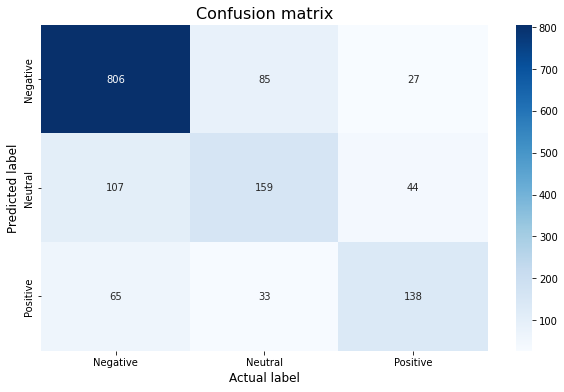

In [ ]:
visualize(random_forest_classifier_prediction, cr)

**Random Forest Accuracy Score**

In [ ]:
accuracy_score(random_forest_classifier_prediction,y_test)

0.7534153005464481

In [ ]:
pipeline.score(X_test, y_test)

0.7534153005464481

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test,random_forest_classifier_prediction
, average = 'micro')

0.7534153005464482

We'll try to search the best parameters using Randomized Grid Search Cross Validation. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier and initialise the parameters for its grid search
rfc = RandomForestClassifier()
# Params dictionary of random forest
# param_grid = dict(max_depth=[2,3,4],n_estimators=[50, 100, 200])
param_grid = dict(
        classifier__max_depth=[None,2,4],
        classifier__n_estimators=[100, 200, 250]
)

In [ ]:
CrossValidationTuning(rfc, param_grid, 'Random_Forest')

Randomized Search Cross Validation is in progress... 


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  File "/usr/local/lib/pyt

Max depth None
Number of trees 250
Randomized Search Cross Validation is in progress... 


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  File "/usr/local/lib/pyt

Max depth 4
Number of trees 100
Randomized Search Cross Validation is in progress... 


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  File "/usr/local/lib/pyt

Max depth None
Number of trees 100
Randomized Search Cross Validation is in progress... 


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  File "/usr/local/lib/pyt

Max depth 2
Number of trees 100
Randomized Search Cross Validation is in progress... 


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  File "/usr/local/lib/pyt

Max depth 2
Number of trees 200


It took a long time (approx. 2 hours until the code is finished running. It gave us some recommendations such as:
1. n_estimators = 200, max_depth = 3
2. n_estimators = 100, max_depth = 4
3. n_estimators = 100, max_depth = None
4. n_estimators = 100, max_depth = 2
5. n_estimators = 200, max_depth = 2

In [ ]:
def optimiseRFC(X_train, y_train, X_test, y_test, n_estimators=200, max_depth = 3, class_weight = 'balanced'):
  rfc = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,class_weight=class_weight)
  fittingEvaluation(rfc, X_train, y_train, X_test, y_test)

Accuracy =  0.7465846994535519
Precision =  0.7465846994535519
Recall =  0.7465846994535519
f1 =  0.746584699453552
[[787  99  32]
 [106 159  45]
 [ 62  27 147]]


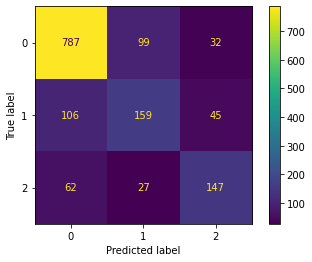

Accuracy =  0.6256830601092896
Precision =  0.6256830601092896
Recall =  0.6256830601092896
f1 =  0.6256830601092896
[[536 303  79]
 [ 39 224  47]
 [ 27  53 156]]


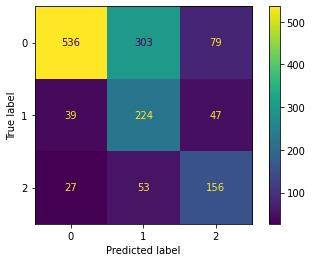

Accuracy =  0.7493169398907104
Precision =  0.7493169398907104
Recall =  0.7493169398907104
f1 =  0.7493169398907104
[[793  98  27]
 [105 159  46]
 [ 63  28 145]]


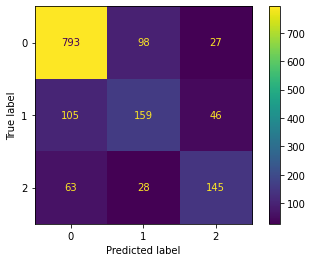

Accuracy =  0.6372950819672131
Precision =  0.6372950819672131
Recall =  0.6372950819672131
f1 =  0.6372950819672131
[[559 291  68]
 [ 43 229  38]
 [ 32  59 145]]


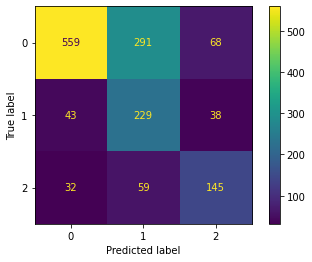

Accuracy =  0.648224043715847
Precision =  0.648224043715847
Recall =  0.648224043715847
f1 =  0.648224043715847
[[603 222  93]
 [ 69 190  51]
 [ 40  40 156]]


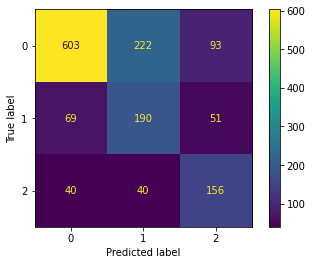

In [ ]:
optimiseRFC(X_train, y_train, X_test, y_test, 250, None)
optimiseRFC(X_train, y_train, X_test, y_test, 100, 4)
optimiseRFC(X_train, y_train, X_test, y_test, 100, None)
optimiseRFC(X_train, y_train, X_test, y_test, 100, 2)
optimiseRFC(X_train, y_train, X_test, y_test, 200, 2)

Unfortunately, none of the parameters that Randomized Grid Search Cross Validation recommends improves the accuracy we got the first time we declared our Random Forest Classifier which is 0.7534153005464482. 

**Support Vector Machine**

Support Vector Machine will find a hyperplane in an N-dimensional space (N - the number of features) that distinctly classifies the data points. SVM has parameters such as C (regularization parameter) and kernel. We define kernel as how the model splits the data either linearly or non-linearly. Meanwhile, The C parameter tells the SVM optimization how much we want to avoid misclassifying each training example. For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. 

A very small value of C will result in the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points. However if we define the values C tiny, we might end up getting misclassified examples, even though the training data is linearly separable. 

In [ ]:
pipeline3 = Pipeline([("Vect", CountVectorizer()), ("svc",SVC())])
pipeline3.fit(X_train,y_train)

Pipeline(steps=[('Vect', CountVectorizer()), ('svc', SVC())])

In [ ]:
SVC_classifier_prediction = pipeline3.predict(X_test)
print(SVC_classifier_prediction)

[1 0 2 ... 2 2 0]


**Model Performance Visualization**

In [ ]:
cr = classification_report(y_test, SVC_classifier_prediction)

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.82      0.91      0.86       918
           1       0.64      0.53      0.58       310
           2       0.73      0.56      0.63       236

    accuracy                           0.77      1464
   macro avg       0.73      0.67      0.69      1464
weighted avg       0.76      0.77      0.76      1464



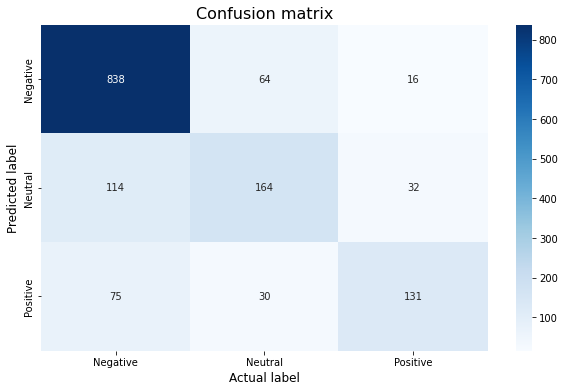

In [ ]:
visualize(SVC_classifier_prediction, cr)

**SVM Accuracy Score**

In [ ]:
accuracy_score(SVC_classifier_prediction,y_test)

0.7739071038251366

In [ ]:
pipeline3.score(X_test, y_test)

0.7739071038251366

In [ ]:
f1_score(y_test,SVC_classifier_prediction
, average = 'micro')

0.7739071038251366

**Naive Bayes**

Naive Bayes classification applies Bayes’ theorem with strong independence assumption between the features. Naive Bayes classification produces good results for textual data analysis such as Natural Language Processing.

Naive Bayes models are also known as simple Bayes or independent Bayes. All these names refer to the application of Bayes’ theorem in the classifier’s decision rule. Naive Bayes classifier applies the Bayes’ theorem in practice.

Naive Bayes Classifier uses the Bayes’ theorem to predict membership probabilities for each class such as the probability that give record or data point belongs to a particular class. The class with the highest probability is considered as the most likely class (a.k.a the Maximum A Posteriori (MAP)).

There are 3 types of Naive Bayes algorithm such as: 
1. Gaussian Naive Bayes
2. Multinomial Naive Bayes
3. Bernoulli Naive Bayes

We use Multinomial Naive Bayes in this case (as it is commonly used in text classification) in which samples represent the frequencies with which certain events have been generated by a multinomial (p1, . . . ,pn) where pi is the probability that event i occurs.

References:
1. https://www.kaggle.com/code/prashant111/naive-bayes-classifier-in-python#20.-Results-and-conclusion-
2. https://scikit-learn.org/stable/modules/naive_bayes.html

In [ ]:
pipeline4 = Pipeline([("Vect", CountVectorizer()), ("nbc",MultinomialNB())])
pipeline4.fit(X_train,y_train)

Pipeline(steps=[('Vect', CountVectorizer()), ('nbc', MultinomialNB())])

In [ ]:
NBC_classifier_prediction = pipeline4.predict(X_test)
print(NBC_classifier_prediction)

[0 0 2 ... 2 0 0]


**Model Performance Visualization**

In [ ]:
cr = classification_report(y_test, NBC_classifier_prediction)

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.79      0.95      0.86       918
           1       0.71      0.43      0.54       310
           2       0.78      0.58      0.66       236

    accuracy                           0.78      1464
   macro avg       0.76      0.65      0.69      1464
weighted avg       0.77      0.78      0.76      1464



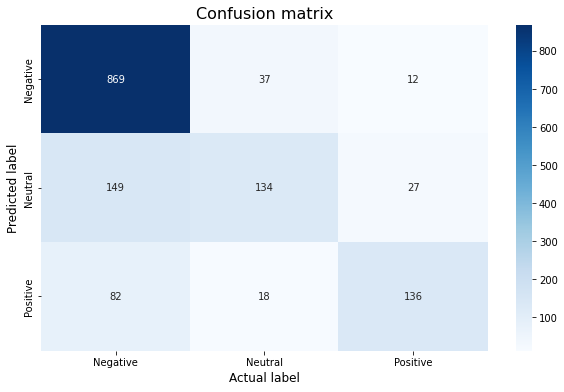

In [ ]:
visualize(NBC_classifier_prediction, cr)

**Naive Bayes Classifier Accuracy Score**`

In [ ]:
accuracy_score(NBC_classifier_prediction,y_test)

0.7780054644808743

In [ ]:
pipeline4.score(X_test, y_test)

0.7780054644808743

In [ ]:
f1_score(y_test,NBC_classifier_prediction
, average = 'micro')

0.7780054644808743

**Decision Tree**

A decision tree is a map of the possible outcomes which has a node or nodes and branches to make a decision of a given problem. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes. 

In [ ]:
pipeline5 = Pipeline([("Vect", CountVectorizer()), ("dtc",DecisionTreeClassifier())])
pipeline5.fit(X_train,y_train)

Pipeline(steps=[('Vect', CountVectorizer()), ('dtc', DecisionTreeClassifier())])

In [ ]:
DTC_classifier_prediction = pipeline5.predict(X_test)
print(DTC_classifier_prediction)

[1 0 0 ... 2 2 0]


**Model Performance Visualization**

In [ ]:
cr = classification_report(y_test, DTC__classifier_prediction)

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.79      0.95      0.86       918
           1       0.71      0.43      0.54       310
           2       0.78      0.58      0.66       236

    accuracy                           0.78      1464
   macro avg       0.76      0.65      0.69      1464
weighted avg       0.77      0.78      0.76      1464



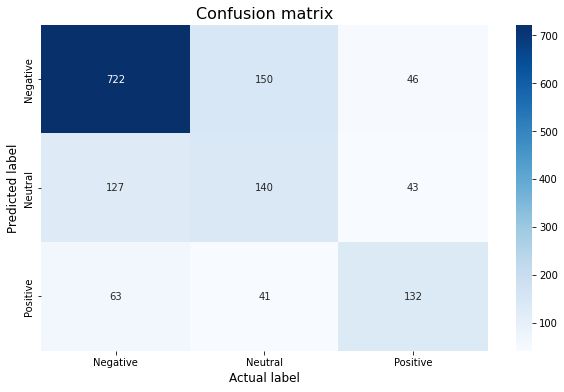

In [ ]:
visualize(DTC_classifier_prediction, cr)

**Decision Tree Classifier Accuracy Score**

In [ ]:
accuracy_score(DTC_classifier_prediction,y_test)

0.6789617486338798

In [ ]:
pipeline5.score(X_test, y_test)

0.6789617486338798

In [ ]:
f1_score(y_test,DTC_classifier_prediction
, average = 'micro')

0.6789617486338798

**ENSEMBLED APPROACH (BAGGING)**

Bagging, also known as bootstrap aggregation, is the ensemble learning method to reduce variance within a noisy dataset. In bagging, after several data samples which are selected from the training set are generated, these weak models are then trained independently which results in a more accurate estimate. Basically, bagging will help improving weak models to improve the accuracy of those models.

References:
1. https://www.ibm.com/uk-en/topics/bagging
2. https://www.d.umn.edu/~rmaclin/cs5751/notes/opitz-jair99.pdf

In [ ]:
pipeline6 = Pipeline([("Vect", CountVectorizer()), ("dtc",DecisionTreeClassifier())])

scores = cross_val_score(pipeline6, X_train, y_train, cv=5)
scores

array([0.69772344, 0.70573356, 0.69856661, 0.70476592, 0.69759595])

In [ ]:
scores.mean()

0.7008770962793109

In [ ]:
from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=100,
    max_samples=0.8,
    oob_score=True
)

pipeline = Pipeline([('Vect', CountVectorizer()), ('bag', bag_model)])

pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

0.7418032786885246

In [ ]:
scores = cross_val_score(pipeline, X_train, y_train, cv=5)
scores.mean()

0.7465850712978563

It turns out that using bagging, decision tree accuracy which is unstable can be improved from 0.70 to 0.74. 

In [ ]:
bag_model_prediction = pipeline.predict(X_test)
print(bag_model_prediction)

[1 0 2 ... 2 2 0]


In [ ]:
f1_score(y_test,bag_model_prediction
, average = 'micro')

0.7418032786885246

Precision =  0.7418032786885246
Recall =  0.7418032786885246
f1 =  0.7418032786885246
[[789  90  39]
 [120 145  45]
 [ 58  26 152]]


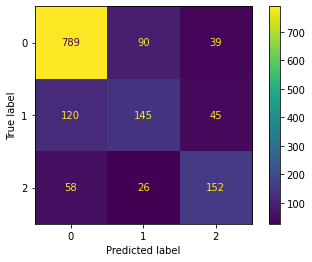

In [ ]:
print('Precision = ', precision_score(y_test, bag_model_prediction, average='micro'))
print('Recall = ', recall_score(y_test, bag_model_prediction, average='micro'))
print('f1 = ', f1_score(y_test, bag_model_prediction, average='micro'))

# Produce the confusion matrix
cm = confusion_matrix(y_test, bag_model_prediction)
print(cm)
# The Confusion matrix as text isn't easy to read - so let's make into a figure
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
display.plot()
plt.show()

**Random Forest As A Comparison**

In [ ]:
pipeline7 = Pipeline([("Vect", CountVectorizer()), ("rfc",RandomForestClassifier())])

scores = cross_val_score(pipeline7, X_train, y_train, cv=5)
scores

array([0.74831366, 0.76770658, 0.75463744, 0.75959511, 0.76381274])

In [ ]:
scores.mean()

0.7588131035282286

Random Forest performs a bit better than Decision Tree using Bagging.

**Bidirectional LSTM on IMDB**

Learning to store information over extended time intervals via recurrent backpropagation takes a very long time, LSTM can learn to bridge minimal time lags and memorize previous states. [1] 

LSTM is a type of Recurrent Neural Network which means that the input can also be the output of the previous steps. It is better than traditional recurrent neural networks in terms of memory. LSTMs perform fairly better because it has a good hold over memorizing certain patterns. [2]

However, RNN suffers from Long Term Dependency Problem which is the time more and more information piles up, then RNNs become less effective at learning new things. LSTM doesn't need to go back to previous stepss as it doesn't implement backpropagation as it has an internal state. 

LSTM performs better than other classic algorithms like Decision Trees, Random Forests, SVM because it is effective in memorizing important information. If we look in other non-neural network classification techniques, they are trained on multiple word as separate inputs that are just word having no actual meaning as a sentence, and while predicting the class it will give the output according to statistics and not according to meaning. That means, every single word is classified into one of the categories.

In LSTM we can use a multiple word string to find out the class to which it belongs. This is very helpful while working with Natural language processing. If we use appropriate layers of embedding and encoding in LSTM, the model will be able to find out the actual meaning in input string and will give the most accurate output class. The following code will elaborate the idea on how text classification is done using LSTM. 



References:
1. Hochreiter, Sepp & Schmidhuber, Jürgen. (1997). Long Short-term Memory. Neural computation. 9. 1735-80. 10.1162/neco.1997.9.8.1735. 
2. https://www.analyticsvidhya.com/blog/2021/06/lstm-for-text-classification/

In [44]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

max_features = 10000 # Only consider the top
maxlen = 200 # Only consider the first 200 words

**Build the model**

In [ ]:
# Input for variable-length sequences of integers
inputs = keras.Input(shape=(None,), dtype="int32")
# Embed each integer in a 128-dimensional vector
x = layers.Embedding(max_features, 128)(inputs)
# Add 2 bidirectional LSTMs
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
# Add a classifier
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 128)         1280000   
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,477,761
Trainable params: 1,477,761
Non-train

In [45]:
from keras.preprocessing.text import Tokenizer

# vectorizer = CountVectorizer()
# X_train_train = vectorizer.fit_transform(X_train)
# X_validation_validation = vectorizer.fit_transform(X_validation)
# X_test_test = vectorizer.fit_transform(X_test)

X_train_train = X_train
X_validation_validation = X_validation
X_test_test = X_test

tokenizer = Tokenizer(num_words=max_features, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_train)
word_index = tokenizer.word_index
print(word_index)

X_train_sequences=tokenizer.texts_to_sequences(X_train_train)
X_train_pad=keras.preprocessing.sequence.pad_sequences(X_train_sequences,maxlen=maxlen, padding='post', truncating='post')

X_validation_sequences=tokenizer.texts_to_sequences(X_validation_validation)
X_validation_pad=keras.preprocessing.sequence.pad_sequences(X_validation_sequences,maxlen=maxlen, padding='post', truncating='post')

X_test_sequences=tokenizer.texts_to_sequences(X_test_test)
X_test_pad=keras.preprocessing.sequence.pad_sequences(X_test_sequences,maxlen=maxlen, padding='post', truncating='post')

{'<OOV>': 1, 'flight': 2, 'get': 3, 'thanks': 4, 'cancelled': 5, 'service': 6, 'help': 7, 'time': 8, 'would': 9, 'customer': 10, 'us': 11, 'amp': 12, 'hours': 13, 'plane': 14, 'hold': 15, 'flights': 16, 'thank': 17, 'still': 18, 'please': 19, 'one': 20, 'need': 21, 'delayed': 22, 'call': 23, 'back': 24, 'gate': 25, 'flightled': 26, 'bag': 27, 'hour': 28, 'got': 29, 'phone': 30, 'late': 31, 'like': 32, 'today': 33, 'guys': 34, 'airline': 35, 'fly': 36, 'waiting': 37, 'u': 38, 'trying': 39, 'know': 40, 'could': 41, 'way': 42, 'great': 43, 'airport': 44, 'day': 45, 'going': 46, 'flying': 47, 'weather': 48, 'wait': 49, 'never': 50, 'go': 51, 'make': 52, 'hrs': 53, 'tomorrow': 54, 'really': 55, 'delay': 56, 'minutes': 57, 'even': 58, 'last': 59, 'check': 60, 'change': 61, 'good': 62, 'aa': 63, 'home': 64, 'people': 65, 'dm': 66, 'first': 67, 'seat': 68, 'want': 69, 'united': 70, 'another': 71, 'new': 72, 'take': 73, 'told': 74, 'w': 75, 'luggage': 76, 'see': 77, 'agent': 78, 'bags': 79, 'ti

In [ ]:
(X_validation_pad)

array([[  43,  273, 4732, ...,    0,    0,    0],
       [   4,  338, 2649, ...,    0,    0,    0],
       [ 161,   24,   15, ...,    0,    0,    0],
       ...,
       [  87, 2462,    2, ...,    0,    0,    0],
       [2646, 4031,  612, ...,    0,    0,    0],
       [  17,    0,    0, ...,    0,    0,    0]], dtype=int32)

In [ ]:
X_train.shape

(11858,)

In [ ]:
X_validation.shape

(1318,)

We do have 11,858 training samples and we define the batch size as 32 which makes 371 steps in every single epoch (iteration). 

In [46]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
model.compile("adam", "binary_crossentropy", metrics=[f1_m])
model.fit(X_train_pad, y_train, batch_size=32, epochs=2, validation_data=(X_validation_pad, y_validation))

Epoch 1/2
371/371 [==============================] - 226s 587ms/step - loss: -0.5749 - f1_m: 0.7256 - val_loss: -2.0402 - val_f1_m: 0.7507
Epoch 2/2
371/371 [==============================] - 248s 670ms/step - loss: -4.7461 - f1_m: 0.8028 - val_loss: -3.9271 - val_f1_m: 0.7339


Our f1 accuracy is 0.7339 after the second epoch. We will try to run 10 epochs as an experiment. 

In [ ]:
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
model.fit(X_train_pad, y_train, batch_size=32, epochs=10, validation_data=(X_validation_pad, y_validation))

Epoch 1/10
371/371 [==============================] - 207s 540ms/step - loss: -8.5095 - accuracy: 0.7152 - val_loss: -7.0783 - val_accuracy: 0.6662
Epoch 2/10
371/371 [==============================] - 193s 520ms/step - loss: -14.7466 - accuracy: 0.7396 - val_loss: -9.7109 - val_accuracy: 0.6495
Epoch 3/10
371/371 [==============================] - 193s 520ms/step - loss: -21.2215 - accuracy: 0.7427 - val_loss: -12.5385 - val_accuracy: 0.6624
Epoch 4/10
371/371 [==============================] - 195s 524ms/step - loss: -27.0686 - accuracy: 0.7510 - val_loss: -16.8416 - val_accuracy: 0.6669
Epoch 5/10
371/371 [==============================] - 191s 516ms/step - loss: -32.8887 - accuracy: 0.7570 - val_loss: -21.2346 - val_accuracy: 0.6555
Epoch 6/10
371/371 [==============================] - 192s 518ms/step - loss: -39.0576 - accuracy: 0.7554 - val_loss: -23.9098 - val_accuracy: 0.6601
Epoch 7/10
371/371 [==============================] - 193s 520ms/step - loss: -45.2457 - accuracy: 0.76

In [ ]:
lstm_prediction = model.predict(X_test_pad)
print(lstm_prediction)

46/46 [==============================] - 7s 119ms/step
[[0.99999434]
 [0.3827189 ]
 [1.        ]
 ...
 [1.        ]
 [1.        ]
 [0.05715306]]


In [ ]:
# evaluate the model
loss, f1_score = model.evaluate(X_test_pad, y_test, verbose=0)

In [ ]:
loss

-4.248483657836914

In [ ]:
f1_score

0.7114900350570679

**SECOND TESTING WITH LSTM WITH 256 NODES**

In [47]:
# Input for variable-length sequences of integers
inputs = keras.Input(shape=(None,), dtype="int32")
# Embed each integer in a 256-dimensional vector
x = layers.Embedding(max_features, 256)(inputs)
# Add 2 bidirectional LSTMs
x = layers.Bidirectional(layers.LSTM(128, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(128))(x)
# Add a classifier
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 256)         2560000   
                                                                 
 bidirectional (Bidirectiona  (None, None, 256)        394240    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              394240    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 3,348,737
Trainable params: 3,348,737
Non-train

In [48]:
model.compile("adam", "binary_crossentropy", metrics=[f1_m])
model.fit(X_train_pad, y_train, batch_size=32, epochs=2, validation_data=(X_validation_pad, y_validation))

Epoch 1/2
371/371 [==============================] - 658s 2s/step - loss: -2.0243 - f1_m: 0.7354 - val_loss: -4.7620 - val_f1_m: 0.5411
Epoch 2/2
371/371 [==============================] - 671s 2s/step - loss: -11.2833 - f1_m: 0.7897 - val_loss: -10.0010 - val_f1_m: 0.7276


In [49]:
lstm_prediction = model.predict(X_test_pad)
print(lstm_prediction)

46/46 [==============================] - 21s 414ms/step
[[0.24885431]
 [0.0236538 ]
 [1.        ]
 ...
 [1.        ]
 [0.78257436]
 [0.02345827]]


In [50]:
# evaluate the model
loss, f1_score = model.evaluate(X_test_pad, y_test, verbose=0)

In [51]:
loss

-10.418514251708984

In [52]:
f1_score

0.7693845629692078

**Testing With Data Augmentation to Cope With Imbalance Data**

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import make_pipeline

Now, we'll try to deal with our imbalance data then fit the balance data to our models. 

**Random Forest**

In [ ]:
pipeline_balance = make_pipeline((CountVectorizer()),(SMOTE()),(RandomForestClassifier()))
pipeline_balance.fit(X_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()), ('smote', SMOTE()),
                ('randomforestclassifier', RandomForestClassifier())])

In [ ]:
random_forest_classifier_balance_prediction = pipeline_balance.predict(X_test)
print(random_forest_classifier_balance_prediction)

[1 0 2 ... 2 2 0]


In [ ]:
cr = classification_report(y_test, random_forest_classifier_balance_prediction)

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.86      0.76      0.81       918
           1       0.45      0.56      0.50       310
           2       0.58      0.66      0.62       236

    accuracy                           0.70      1464
   macro avg       0.63      0.66      0.64      1464
weighted avg       0.73      0.70      0.71      1464



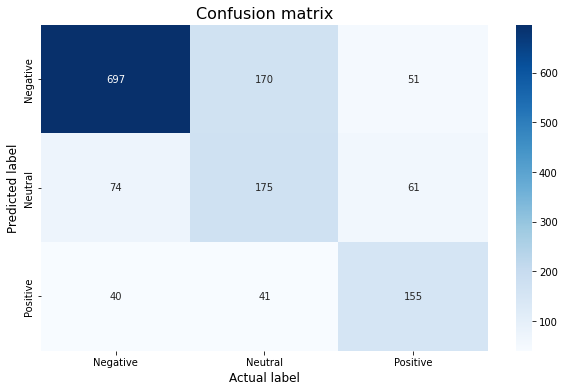

In [ ]:
visualize(random_forest_classifier_balance_prediction, cr)

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test,random_forest_classifier_balance_prediction
, average = 'micro')

0.7015027322404371

**OPTIMISATION AFTER EVALUATION OF RANDOM FOREST**

In [ ]:
def optimiseRFC(X_train, y_train, X_test, y_test, n_estimators=200, max_depth = 3, class_weight = 'balanced'):
  rfc = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,class_weight=class_weight)
  fittingEvaluation(rfc, X_train, y_train, X_test, y_test, oversampling=True)

Accuracy =  0.7056010928961749
Precision =  0.7056010928961749
Recall =  0.7056010928961749
f1 =  0.7056010928961749
[[692 170  56]
 [ 69 182  59]
 [ 44  33 159]]


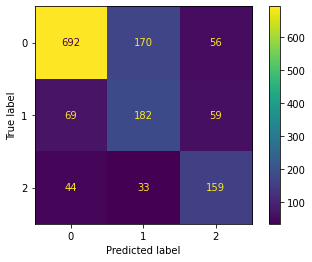

Accuracy =  0.6823770491803278
Precision =  0.6823770491803278
Recall =  0.6823770491803278
f1 =  0.6823770491803278
[[687 203  28]
 [ 82 195  33]
 [ 59  60 117]]


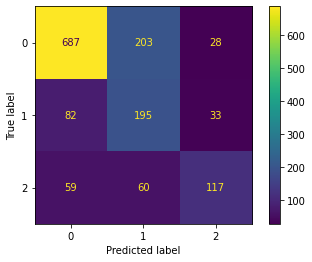

Accuracy =  0.7042349726775956
Precision =  0.7042349726775956
Recall =  0.7042349726775956
f1 =  0.7042349726775956
[[701 161  56]
 [ 73 173  64]
 [ 45  34 157]]


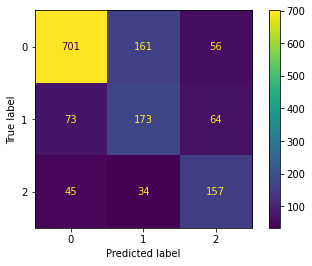

Accuracy =  0.6680327868852459
Precision =  0.6680327868852459
Recall =  0.6680327868852459
f1 =  0.6680327868852459
[[655 234  29]
 [ 83 192  35]
 [ 45  60 131]]


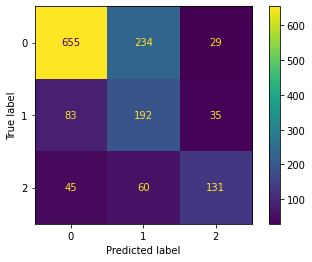

Accuracy =  0.6789617486338798
Precision =  0.6789617486338798
Recall =  0.6789617486338798
f1 =  0.6789617486338798
[[703 184  31]
 [101 174  35]
 [ 64  55 117]]


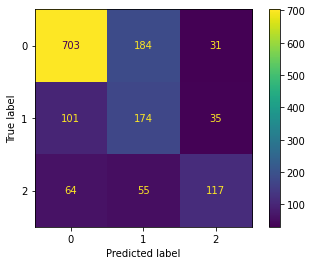

In [ ]:
optimiseRFC(X_train, y_train, X_test, y_test, 250, None)
optimiseRFC(X_train, y_train, X_test, y_test, 100, 4)
optimiseRFC(X_train, y_train, X_test, y_test, 100, None)
optimiseRFC(X_train, y_train, X_test, y_test, 100, 2)
optimiseRFC(X_train, y_train, X_test, y_test, 200, 2)

**SVM**

In [ ]:
pipeline3_balance = make_pipeline((CountVectorizer()), (SMOTE()), (SVC()))
pipeline3_balance.fit(X_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()), ('smote', SMOTE()),
                ('svc', SVC())])

In [ ]:
SVC_classifier_balance_prediction = pipeline3_balance.predict(X_test)
print(SVC_classifier_balance_prediction)

[1 0 2 ... 2 2 0]


In [ ]:
cr = classification_report(y_test, SVC_classifier_balance_prediction)

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.79      0.90      0.84       918
           1       0.61      0.46      0.52       310
           2       0.69      0.54      0.60       236

    accuracy                           0.75      1464
   macro avg       0.70      0.63      0.66      1464
weighted avg       0.74      0.75      0.74      1464



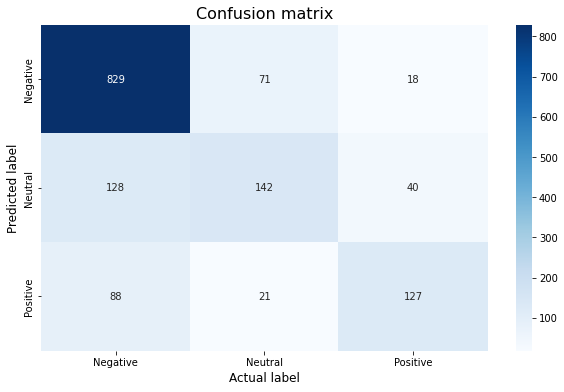

In [ ]:
visualize(SVC_classifier_balance_prediction, cr)

In [ ]:
f1_score(y_test,SVC_classifier_balance_prediction
, average = 'micro')

0.75

**OPTIMISATION AFTER BALANCING THE DATA USING SVM**

In [ ]:
def optimiseSVM(X_train, y_train, X_test, y_test, C=1.0, kernel = 'rbf'):
  svm = SVC(C=C, kernel=kernel)
  fittingEvaluation(svm, X_train, y_train, X_test, y_test, oversampling=True)

Accuracy =  0.7527322404371585
Precision =  0.7527322404371585
Recall =  0.7527322404371585
f1 =  0.7527322404371585
[[763 120  35]
 [ 79 177  54]
 [ 45  29 162]]


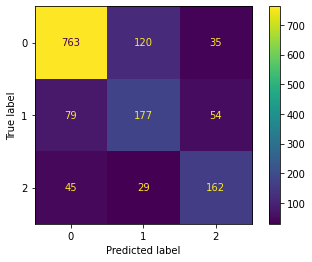

Accuracy =  0.7377049180327869
Precision =  0.7377049180327869
Recall =  0.7377049180327869
f1 =  0.7377049180327869
[[837  65  16]
 [150 132  28]
 [103  22 111]]


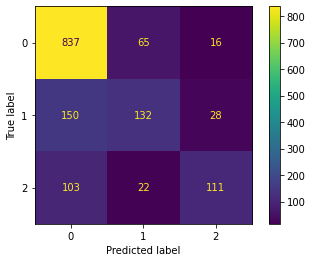

Accuracy =  0.7540983606557377
Precision =  0.7540983606557377
Recall =  0.7540983606557377
f1 =  0.7540983606557377
[[758 124  36]
 [ 74 183  53]
 [ 49  24 163]]


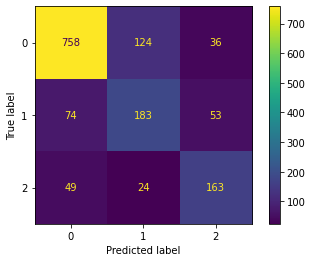

Accuracy =  0.7540983606557377
Precision =  0.7540983606557377
Recall =  0.7540983606557377
f1 =  0.7540983606557377
[[818  78  22]
 [115 156  39]
 [ 82  24 130]]


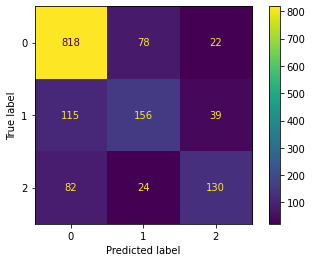

Accuracy =  0.7520491803278688
Precision =  0.7520491803278688
Recall =  0.7520491803278688
f1 =  0.7520491803278688
[[759 117  42]
 [ 78 177  55]
 [ 47  24 165]]


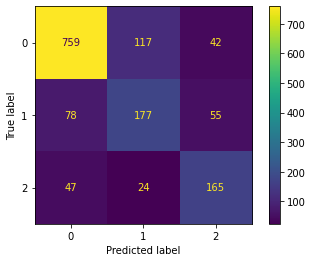

In [ ]:
optimiseSVM(X_train, y_train, X_test, y_test, 1.0, 'linear')
optimiseSVM(X_train, y_train, X_test, y_test, 0.5, 'rbf')
optimiseSVM(X_train, y_train, X_test, y_test, 0.5, 'linear')
optimiseSVM(X_train, y_train, X_test, y_test, 2.0, 'rbf')
optimiseSVM(X_train, y_train, X_test, y_test, 2.0, 'linear')

We see for kernel linear, when the C parameter is 0.5 it improves the accuracy and for kernel rbf, when C is 2.0, it also improves our accuracy a bit.

**Naive Bayes Classifier**

In [ ]:
pipeline4_balance = make_pipeline((CountVectorizer()), (SMOTE()), (MultinomialNB()))
pipeline4_balance.fit(X_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()), ('smote', SMOTE()),
                ('multinomialnb', MultinomialNB())])

In [ ]:
NBC_classifier_balance_prediction = pipeline4_balance.predict(X_test)
print(NBC_classifier_balance_prediction)

[0 0 2 ... 2 2 0]


In [ ]:
cr = classification_report(y_test, NBC_classifier_balance_prediction)

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.84      0.89      0.87       918
           1       0.62      0.54      0.58       310
           2       0.71      0.67      0.69       236

    accuracy                           0.78      1464
   macro avg       0.73      0.70      0.71      1464
weighted avg       0.78      0.78      0.78      1464



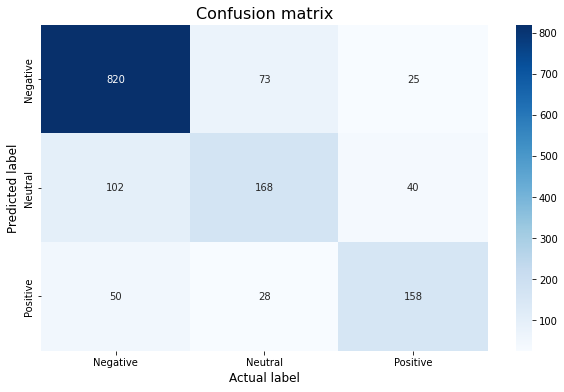

In [ ]:
visualize(NBC_classifier_balance_prediction, cr)

In [ ]:
f1_score(y_test,NBC_classifier_balance_prediction
, average = 'micro')

0.7827868852459017

**OPTIMISATION AFTER BALANCING THE DATA USING  NAIVE BAYES CLASSIFIER**

In [ ]:
def optimiseNBC(X_train, y_train, X_test, y_test, alpha=1.0):
  nbc = MultinomialNB(alpha=alpha)
  fittingEvaluation(nbc, X_train, y_train, X_test, y_test, oversampling=True)

Accuracy =  0.7773224043715847
Precision =  0.7773224043715847
Recall =  0.7773224043715847
f1 =  0.7773224043715847
[[814  78  26]
 [104 166  40]
 [ 50  28 158]]


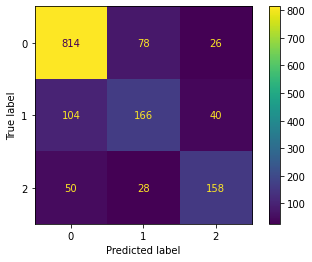

Accuracy =  0.7848360655737705
Precision =  0.7848360655737705
Recall =  0.7848360655737705
f1 =  0.7848360655737705
[[807  87  24]
 [ 90 178  42]
 [ 42  30 164]]


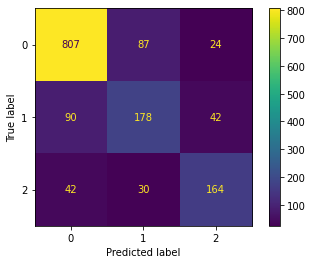

Accuracy =  0.7800546448087432
Precision =  0.7800546448087432
Recall =  0.7800546448087432
f1 =  0.7800546448087432
[[843  53  22]
 [125 146  39]
 [ 60  23 153]]


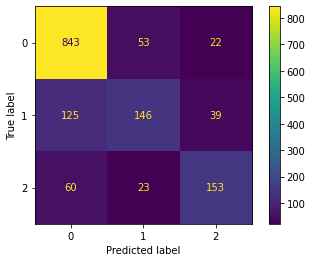

In [ ]:
optimiseNBC(X_train, y_train, X_test, y_test, 1.0)
optimiseNBC(X_train, y_train, X_test, y_test, 0.5)
optimiseNBC(X_train, y_train, X_test, y_test, 2.0)

**Decision Tree**

In [ ]:
pipeline5_balance = make_pipeline((CountVectorizer()), (SMOTE()), (DecisionTreeClassifier()))
pipeline5_balance.fit(X_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()), ('smote', SMOTE()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [ ]:
DTC_classifier_balance_prediction = pipeline5_balance.predict(X_test)
print(DTC_classifier_balance_prediction)

[1 2 0 ... 2 2 0]


In [ ]:
cr = classification_report(y_test, DTC_classifier_balance_prediction)

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.82      0.66      0.73       918
           1       0.41      0.53      0.46       310
           2       0.47      0.64      0.54       236

    accuracy                           0.63      1464
   macro avg       0.57      0.61      0.58      1464
weighted avg       0.68      0.63      0.65      1464



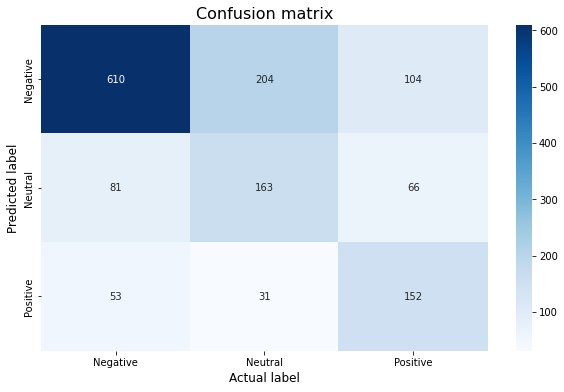

In [ ]:
visualize(DTC_classifier_balance_prediction, cr)

In [ ]:
f1_score(y_test,DTC_classifier_balance_prediction
, average = 'micro')

0.6318306010928961

**OPTIMISATION AFTER BALANCING THE DATA USING DECISION TREE CLASSIFIER**

In [ ]:
def optimiseDTC(X_train, y_train, X_test, y_test, criterion="gini", max_depth=None, max_features=None):
  dtc = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, max_features=max_features)
  fittingEvaluation(dtc, X_train, y_train, X_test, y_test, oversampling=True)

Accuracy =  0.5136612021857924
Precision =  0.5136612021857924
Recall =  0.5136612021857924
f1 =  0.5136612021857924
[[505 389  24]
 [ 74 221  15]
 [ 55 155  26]]


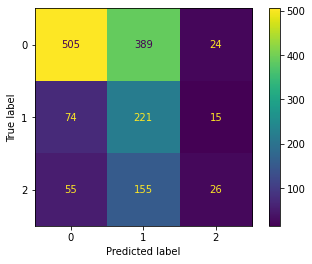

Accuracy =  0.6188524590163934
Precision =  0.6188524590163934
Recall =  0.6188524590163934
f1 =  0.6188524590163934
[[606 252  60]
 [ 76 205  29]
 [ 67  74  95]]


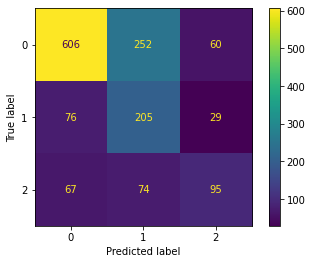

Accuracy =  0.5204918032786885
Precision =  0.5204918032786885
Recall =  0.5204918032786885
f1 =  0.5204918032786885
[[503 393  22]
 [ 77 227   6]
 [ 55 149  32]]


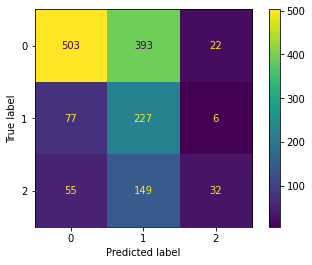

Accuracy =  0.5560109289617486
Precision =  0.5560109289617486
Recall =  0.5560109289617486
f1 =  0.5560109289617486
[[555 154 209]
 [ 77 113 120]
 [ 54  36 146]]


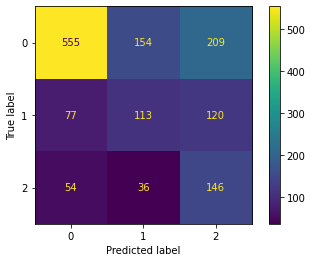

Accuracy =  0.6263661202185792
Precision =  0.6263661202185792
Recall =  0.6263661202185792
f1 =  0.6263661202185792
[[600 211 107]
 [ 79 161  70]
 [ 49  31 156]]


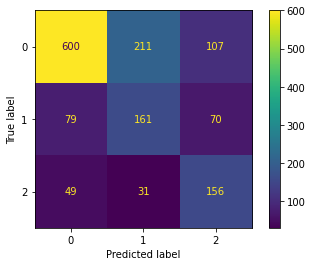

Accuracy =  0.5949453551912568
Precision =  0.5949453551912568
Recall =  0.5949453551912568
f1 =  0.5949453551912568
[[568 239 111]
 [ 80 169  61]
 [ 62  40 134]]


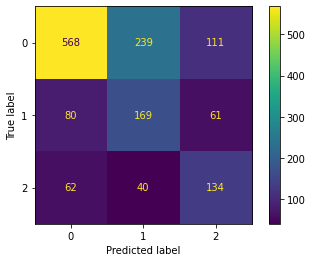

In [ ]:
optimiseDTC(X_train, y_train, X_test, y_test, "gini", 50, "auto")
optimiseDTC(X_train, y_train, X_test, y_test, "gini", 100, "sqrt")
optimiseDTC(X_train, y_train, X_test, y_test, "entropy", 50, "auto")
optimiseDTC(X_train, y_train, X_test, y_test, "entropy", 100, "sqrt")
optimiseDTC(X_train, y_train, X_test, y_test, "entropy", None, None)
optimiseDTC(X_train, y_train, X_test, y_test, "entropy", None, "auto")

**ENSEMBLED APPROACH (BAGGING)**

In [ ]:
from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=100,
    max_samples=0.8,
    oob_score=True
)

pipeline = make_pipeline((CountVectorizer()), (SMOTE()), (bag_model))

pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

0.6523224043715847

In [ ]:
scores = cross_val_score(pipeline, X_train, y_train, cv=5)
scores.mean()

0.6540727864734286

In [ ]:
bag_model_prediction = pipeline.predict(X_test)
print(bag_model_prediction)

[1 0 2 ... 2 2 0]


Precision =  0.6523224043715847
Recall =  0.6523224043715847
f1 =  0.6523224043715847
[[612 191 115]
 [ 61 173  76]
 [ 37  29 170]]


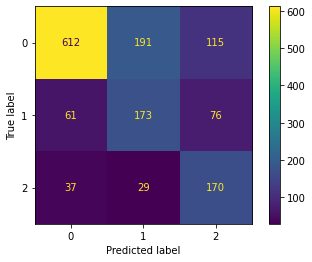

In [ ]:
f1_score(y_test,bag_model_prediction
, average = 'micro')
print('Precision = ', precision_score(y_test, bag_model_prediction, average='micro'))
print('Recall = ', recall_score(y_test, bag_model_prediction, average='micro'))
print('f1 = ', f1_score(y_test, bag_model_prediction, average='micro'))

# Produce the confusion matrix
cm = confusion_matrix(y_test, bag_model_prediction)
print(cm)
# The Confusion matrix as text isn't easy to read - so let's make into a figure
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
display.plot()
plt.show()

**Bidirectional LSTM on IMDB**

In [7]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

max_features = 10000 # Only consider the top
maxlen = 200 # Only consider the first 200 words

In [ ]:
# Input for variable-length sequences of integers
inputs = keras.Input(shape=(None,), dtype="int32")
# Embed each integer in a 128-dimensional vector
x = layers.Embedding(max_features, 128)(inputs)
# Add 2 bidirectional LSTMs
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
# Add a classifier
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_1 (Embedding)     (None, None, 128)         1280000   
                                                                 
 bidirectional_2 (Bidirectio  (None, None, 128)        98816     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,477,761
Trainable params: 1,477,761
Non-tra

In [19]:
from keras.preprocessing.text import Tokenizer

X_train_train = X_train
X_validation_validation = X_validation
X_test_test = X_test

tokenizer = Tokenizer(num_words=max_features, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_train)
word_index = tokenizer.word_index
print(word_index)

X_train_sequences=tokenizer.texts_to_sequences(X_train_train)
X_train_pad=keras.preprocessing.sequence.pad_sequences(X_train_sequences,maxlen=maxlen, padding='post', truncating='post')

X_validation_sequences=tokenizer.texts_to_sequences(X_validation_validation)
X_validation_pad=keras.preprocessing.sequence.pad_sequences(X_validation_sequences,maxlen=maxlen, padding='post', truncating='post')

X_test_sequences=tokenizer.texts_to_sequences(X_test_test)
X_test_pad=keras.preprocessing.sequence.pad_sequences(X_test_sequences,maxlen=maxlen, padding='post', truncating='post')

(X_validation_pad)

{'<OOV>': 1, 'flight': 2, 'get': 3, 'thanks': 4, 'cancelled': 5, 'service': 6, 'help': 7, 'time': 8, 'would': 9, 'customer': 10, 'us': 11, 'amp': 12, 'hours': 13, 'plane': 14, 'hold': 15, 'flights': 16, 'thank': 17, 'still': 18, 'please': 19, 'one': 20, 'need': 21, 'delayed': 22, 'call': 23, 'back': 24, 'gate': 25, 'flightled': 26, 'bag': 27, 'hour': 28, 'got': 29, 'phone': 30, 'late': 31, 'like': 32, 'today': 33, 'guys': 34, 'airline': 35, 'fly': 36, 'waiting': 37, 'u': 38, 'trying': 39, 'know': 40, 'could': 41, 'way': 42, 'great': 43, 'airport': 44, 'day': 45, 'going': 46, 'flying': 47, 'weather': 48, 'wait': 49, 'never': 50, 'go': 51, 'make': 52, 'hrs': 53, 'tomorrow': 54, 'really': 55, 'delay': 56, 'minutes': 57, 'even': 58, 'last': 59, 'check': 60, 'change': 61, 'good': 62, 'aa': 63, 'home': 64, 'people': 65, 'dm': 66, 'first': 67, 'seat': 68, 'want': 69, 'united': 70, 'another': 71, 'new': 72, 'take': 73, 'told': 74, 'w': 75, 'luggage': 76, 'see': 77, 'agent': 78, 'bags': 79, 'ti

array([[  43,  273, 4732, ...,    0,    0,    0],
       [   4,  338, 2649, ...,    0,    0,    0],
       [ 161,   24,   15, ...,    0,    0,    0],
       ...,
       [  87, 2462,    2, ...,    0,    0,    0],
       [2646, 4031,  612, ...,    0,    0,    0],
       [  17,    0,    0, ...,    0,    0,    0]], dtype=int32)

In [20]:
X_train.shape

(11858,)

In [21]:
sm = SMOTE()
X_train_pad_balance, y_train_balance = sm.fit_resample(X_train_pad, y_train)
X_validation_pad_balance, y_validation_balance = sm.fit_resample(X_validation_pad, y_validation)
X_test_pad_balance, y_test_balance = sm.fit_resample(X_test_pad, y_test)

In [22]:
X_train_pad_balance.shape

(22302, 200)

In [23]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
model.compile("adam", "binary_crossentropy", metrics=[f1_m])
model.fit(X_train_pad_balance, y_train_balance, batch_size=32, epochs=2, validation_data=(X_validation_pad_balance, y_validation_balance))

Epoch 1/2
697/697 [==============================] - 378s 529ms/step - loss: -4.7088 - f1_m: 0.8156 - val_loss: -6.6420 - val_f1_m: 0.7557
Epoch 2/2
697/697 [==============================] - 390s 560ms/step - loss: -18.5955 - f1_m: 0.8374 - val_loss: -13.1241 - val_f1_m: 0.7641


In [ ]:
lstm_prediction = model.predict(X_test_pad_balance)
print(lstm_prediction)

87/87 [==============================] - 12s 133ms/step
[[1.        ]
 [0.61042446]
 [1.        ]
 ...
 [1.        ]
 [0.4932137 ]
 [1.        ]]


In [ ]:
# evaluate the model
loss, f1_score = model.evaluate(X_test_pad_balance, y_test_balance, verbose=0)

In [ ]:
loss

-11.36458683013916

In [ ]:
f1_score

0.7734847068786621

**LSTM WITH 256 DIMENSIONAL LAYER**

In [24]:
# Input for variable-length sequences of integers
inputs = keras.Input(shape=(None,), dtype="int32")
# Embed each integer in a 256-dimensional vector
x = layers.Embedding(max_features, 256)(inputs)
# Add 2 bidirectional LSTMs
x = layers.Bidirectional(layers.LSTM(128, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(128))(x)
# Add a classifier
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 256)         2560000   
                                                                 
 bidirectional (Bidirectiona  (None, None, 256)        394240    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              394240    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 3,348,737
Trainable params: 3,348,737
Non-train

In [25]:
model.compile("adam", "binary_crossentropy", metrics=[f1_m])
model.fit(X_train_pad_balance, y_train_balance, batch_size=32, epochs=2, validation_data=(X_validation_pad_balance, y_validation_balance))

Epoch 1/2
697/697 [==============================] - 1271s 2s/step - loss: -7.5128 - f1_m: 0.8172 - val_loss: -11.4211 - val_f1_m: 0.7639
Epoch 2/2
697/697 [==============================] - 1261s 2s/step - loss: -29.2613 - f1_m: 0.8361 - val_loss: -21.0620 - val_f1_m: 0.7596


In [26]:
lstm_prediction = model.predict(X_test_pad_balance)
print(lstm_prediction)

87/87 [==============================] - 37s 404ms/step
[[1.        ]
 [0.05510299]
 [1.        ]
 ...
 [1.        ]
 [0.45021564]
 [0.7655724 ]]


In [27]:
# evaluate the model
loss, f1_score = model.evaluate(X_test_pad_balance, y_test_balance, verbose=0)

In [28]:
loss

-21.3577880859375

In [29]:
f1_score

0.7704992890357971